In [1]:
%pylab inline
from ipywidgets import *
from em_examples.Reflection import PowerReflection

Populating the interactive namespace from numpy and matplotlib


# Title: Reflection and Refraction of plane waves

# Purpose

XXX

# Set up

XXX
<img src="http://em.geosci.xyz/_images/snellslaw_setup.png" width=500 px></img>

## TE mode

XXX

<img src="http://em.geosci.xyz/_images/fresnel_setup_TE.png" width=500 px></img>

## TM mode

XXX

<img src="http://em.geosci.xyz/_images/fresnel_setup_TM.png" width=500 px></img>

# Questions

- XXX

- XXX

# Reflection and Transmision app

## Parameters

- $\sigma_1$: Conductivity of the first layer (S/m)

- $\sigma_2$: Conductivity of the first layer (S/m)

- $f$ (Hz): Frequency (Hz)

- Type: 

    - Reflection: Transmission power as a function of incident angle    
    - Transmission: Transmission power as a function of incident angle    
    - Angle: relationship between $\theta_i$ and $\theta_t$

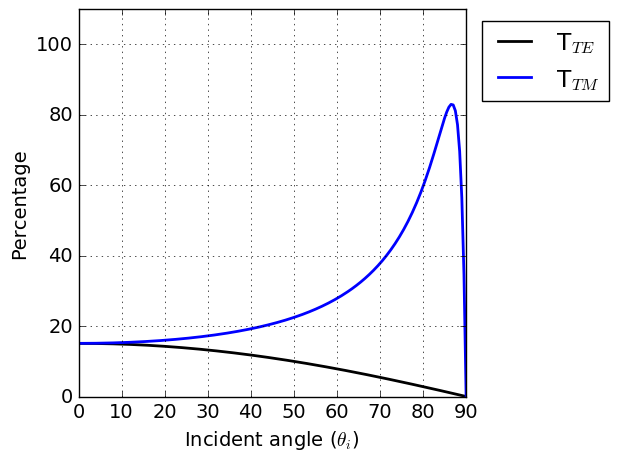

In [2]:
Q = interact(PowerReflection
        , sig1 = FloatText(value=0., description="$\sigma_1$")
        , sig2 = FloatText(value=1e-2, description="$\sigma_2$")
        , f = FloatText(value=6e5, description="$f$ (Hz)")
        , Type = ToggleButtons(options=["Reflection", "Transmission", "Angle"])
        )

# Explore

- XXX

- XXX